In [2]:
# You need to be in this venv .\venv\Scripts\Activate.ps1

## Load the labeled data from TDC 

In [3]:
from tdc.single_pred import ADME
import pandas as pd
data = ADME(name = 'CYP2C19_Veith') # this is the datset I will be working with.

split = data.get_split()

Found local copy...
Loading...
Done!


In [4]:

df = pd.read_csv('data\cyp2c19_veith.tab', sep='\t')
df

,Drug_ID,Drug,Y
0,6602638.0,CCCC(=O)Nc1ccc(N2CCN(CC)CC2)c(Cl)c1.Cl,0
1,644675.0,CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1,1
2,644851.0,Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1,1
3,644890.0,COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1,1
4,644968.0,COc1ccccc1CNC(=O)Cn1nnc(-c2ccncc2)n1,1
...,...,...,...
12660,16758814.0,CCN1C(=O)[C@@H]2[C@@H](CC[C@@H]3C(=O)C=C[C@@H]...,0
12661,16758816.0,O=C1[C@H]2CC=C3[C@@H]([C@H](O)[C@H]4O[C@@H]4C3...,0
12662,16758817.0,CCN1C(=O)[C@H]2CC=C3[C@@H]([C@H](O)[C@H]4O[C@@...,1
12663,16758818.0,C[C@H](c1ccccc1)N1C(=O)[C@@H]2[C@@H](CC[C@@H]3...,0


In [5]:
cleaned_df = df[['Drug', 'Y']]
cleaned_df.columns = ['SMILE','Target']
print(cleaned_df.head())
print(cleaned_df.shape)
cleaned_df.to_csv('data\cleaned_raw_data.csv',index=False)


                                             SMILE  Target
0           CCCC(=O)Nc1ccc(N2CCN(CC)CC2)c(Cl)c1.Cl       0
1       CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1       1
2                 Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1       1
3  COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1       1
4             COc1ccccc1CNC(=O)Cn1nnc(-c2ccncc2)n1       1
(12665, 2)


### data/cleaned_raw_data.csv is the all of the SMILE, target Pairs. 

### Sanity Check of data

See if there are any Null values. and the distribution of True and False targets.

In [37]:
cleaned_df.isna().sum()
# there are no null values in all of the data

SMILE     0
Target    0
dtype: int64

In [11]:
cleaned_df['Target'].value_counts(normalize=True)

0    0.540545
1    0.459455
Name: Target, dtype: float64

54% are negative examples and 46% positive examples. The data is unbalanced but not overly so.

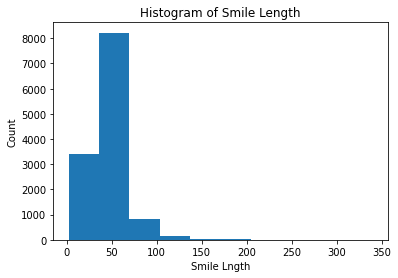

In [36]:
import matplotlib.pyplot as plt
smile_len = cleaned_df['SMILE'].str.len()
plt.hist(smile_len)
plt.title('Histogram of Smile Length')
plt.xlabel('Smile Lngth')
plt.ylabel('Count')
plt.show()

## How many unique characters are there in the data?

In [35]:
smiles = list(cleaned_df['SMILE'])

unique_chars = set()
for s in smiles:
    chars_in_s = set([char for char in s])
    unique_chars |= chars_in_s


print(sorted(list(unique_chars)))
print(len(unique_chars))

['#', '%', '(', ')', '+', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', '@', 'A', 'B', 'C', 'F', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'W', 'Z', '[', '\\', ']', 'a', 'b', 'c', 'e', 'g', 'i', 'l', 'n', 'o', 'r', 's', 't', 'u']
52


### There are 52 unique characters in the dataset. 